# tensorflow 高层 `API`

---

分别使用 `keras` 和 `slim` 这两个非常流行的高层 `api` 尝试构造 `AlexNet`    
    
      
      

# Keras
---

In [1]:
import keras

Using TensorFlow backend.


`Keras` 自带了 `cifar10` 数据集，并且自动分成了训练集和测试集

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

x_train /= 255
x_test /= 255

In [4]:
print((type(x_train), type(y_train)))
print((x_train.shape, y_train.shape))
print((x_test.shape, y_test.shape))

(<class 'numpy.ndarray'>, <class 'numpy.ndarray'>)
((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))


`Keras` 的数据不需要转化成 `tensorflow` 下的 `tensor` ，可以直接作为网络的输入层

# 构建 `Keras` 模型

## `Keras` 网络层

`keras` 为了方便用户搭建神经网络模型，把很多常用的层，比如 `Conv2d`， `MaxPooling2d` ，封装起来，是的输入更加简单明了。

## `Keras` 模型

`Keras` 提供 `Sequential` 和 `Model` 两种模型的构建方法，使用它们搭建模型就像搭积木一样非常直观简单。

---

下面就来体验一下
* 首先定义一个 `Sequential` 模型

In [5]:
from keras.models import Sequential

In [6]:
model = Sequential()

从 `keras` 中导入需要的模型

In [7]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import Activation

In [8]:
# 然后添加第一卷积层，卷积核为 `5 X 5 X 64`，步长为 `1 X 1`，激活函数是 `relu`
# 注意，添加第一层的时候需要著名输入的形状是什么

model.add(Conv2D(64, (5, 5), input_shape = (32, 32, 3)))
model.add(Activation('relu'))

# 继续添加第二池化层，核为 `3 X 3`, 步长为 `2 X 2`
model.add(MaxPooling2D([3, 3], 2))

# 第三卷积层 `5 X 5 X 64` ，步长为 `1 X 1` ，激活函数是 `relu`
model.add(Conv2D(64, (5, 5), activation = 'relu'))

# 第四池化层，核大小是 `3 X 3`，步长为 `2 X 2`
model.add(MaxPooling2D([3, 3], 2))

# 将矩阵摊平成向量
model.add(Flatten())

# 第五全连接层，输出为 384 维向量, 激活函数是 `relu`
model.add(Dense(384, activation = 'relu'))

# 第六全连接层，输出为 192 维向量，激活函数是 `relu`
model.add(Dense(192, activation = 'relu'))

# 第七全连接层，是模型的最后一层，将输出结果，输出为 10 维向量。其中，激活函数是 `sofrmax`
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



现在已经完成了模型的的搭建   
`keras` 还提供了很多方法帮助我们理解模型
* `model.summary()`
* `plot_model`

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 384)              

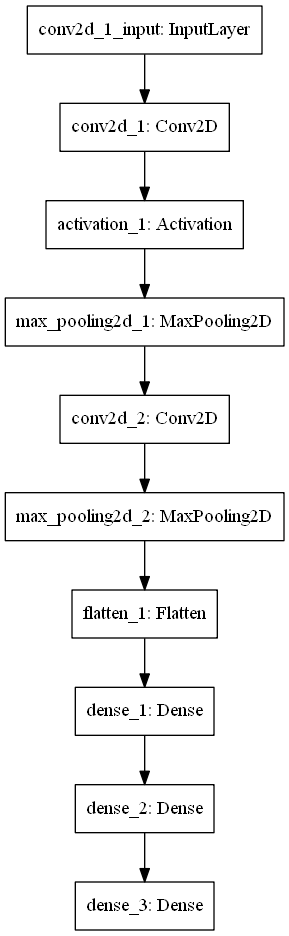

In [10]:
#这两句不加的话系统找不到 graphviz 的执行文件路径
import os     
os.environ["PATH"] += os.pathsep + 'D:/WORKING/graphviz-2.38/release/bin'

from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'keras_alexnet.png')

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_do(model).create(prog = 'dot', format = 'svg'))

NameError: name 'model_to_do' is not defined

# 模型编译

模型构建完成之后，需要用 `compile` 来配置训练过程
`model.compile()` 接受三个参数：
* optimizer：优化方法，有 `sgd` ， `rmsprop`， `adgrad` 等这样的字符串，也可以是 `keras.Optimizers` 对象
* loss：损失函数，有 `categorical_crossentropy` ，`mes` 等这样的字符串，也可以是函数形式
* metrics：评价函数，如 `['accuracy']` ，也支持自定义

In [ ]:
from keras import optimizers

In [ ]:
sgd = optimizers.SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ['accuracy'])

将标签转化成 `onehot` 形式

In [ ]:
onehot_train = keras.utils.to_categorical(y_train, num_classes = 10)

sgd = optimizers.SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ['accuracy'])

# 训练

`keras` 训练模型非常简单，用一个 `fit` 函数就可以搞定

In [ ]:
model.fit(x = x_train, y = onehot_train, epochs = 25, batch_size = 64)

# 评价

`keras` 的评价也非常简单，用一个 `evaluate` 就可以

onehot_test = keras.utils.to_categorical(y_test)

In [ ]:
model.evaluate(x_train, onehot_train, batch_size = 128)

In [ ]:
model.evaluate(x_train, onehot_train, batch_size = 128)

可以看到， `keras` 无论是在构建模型，构建训练，还是在评价模型上都比原生的 `tensorflow` 都要简洁易用


# TF-Slim
---
`TF-slim` 是一个可以在 `tensorflow` 中实现构建模型，评估模型的轻量级代码库。可以和原生的 `tensorflow` 或者其他例如 `tf.contrib.learn` 这样的框架自由组合

# import tensorflow.contrib.slim as slim

In [ ]:
import tensorflow.contrib.slim as slim

来看看如何用 `slim` 来简化模型的定义，训练和评估。首先从本地中导入 `cifar10` 数据集

In [ ]:
# import tensorflow as tf
# from utils import cifar10_input

In [ ]:
# 定义一个批次有 64 个样本
batch_size = 64

train_imgs, train_labels, val_imgs, val_labels = cifar10_iput.load_data(data_dir = '经典卷积神经网络/cifar10_data')

# slim构建模型

## `slim` 中的高级层

`slim` 也对 `tensorflow` 的底层 `API` 进行了层的封装， 像 `keras` 一样，它也具有   
* 定义要对哪些函数使用默认参数
* 定义要使用的默认参数的具体值

In [ ]:
# 定义alexnet模型
def alexnet(input, reuse = None):
    with tf.variable_